In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps

# Google developer API key

from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)




In [3]:
# Reference the file where the CSV is located
crime_csv_path = "Crimes_-_2001_to_present.csv"

# Import the data into a Pandas DataFrame
crimes_data_df = pd.read_csv(crime_csv_path)
crimes_data_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,3/18/15 19:44,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,2/10/18 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,3/18/15 23:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,2/10/18 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,3/18/15 22:45,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,2/10/18 15:50,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,3/18/15 22:30,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,2/10/18 15:50,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,3/18/15 21:00,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,3,1144920.0,1898709.0,2015,2/10/18 15:50,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [4]:

# Combining similar offenses together
crimes_data_df["Primary Type"] = crimes_data_df["Primary Type"].replace(
   {"THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
    "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
    "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
    "OTHER OFFENSES", "GAMBLING":"OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
    "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
    "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
    "NON-CRIMINAL": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
    "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES","PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
    "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES", "DOMESTIC VIOLENCE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "HOMICIDE": "OTHER OFFENSES"})

In [5]:
crimes_data_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,3/18/15 19:44,047XX W OHIO ST,041A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,2/10/18 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,3/18/15 23:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSES,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,2/10/18 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,3/18/15 22:45,044XX S LAKE PARK AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,2/10/18 15:50,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,3/18/15 22:30,051XX S MICHIGAN AVE,460,ASSAULT,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,2/10/18 15:50,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,3/18/15 21:00,047XX W ADAMS ST,031A,THEFT & ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,3,1144920.0,1898709.0,2015,2/10/18 15:50,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [61]:
crimes_count_inward = crimes_data_df.groupby('Ward')['ID'].nunique()
crimes_count_in_wards = pd.DataFrame(crimes_count_inward)



In [67]:
#crimes_data_df["Location Description"].value_counts()

In [66]:
commited_on_street=crimes_data_df.loc[crimes_data_df["Location Description"]=="STREET"]


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,3/18/15 19:44,047XX W OHIO ST,041A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,2/10/18 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,3/18/15 23:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSES,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,2/10/18 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)"
8,10000101,HY190020,3/18/15 22:09,036XX S WOLCOTT AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,11.0,59.0,18,1164279.0,1880656.0,2015,2/10/18 15:50,41.828138,-87.672782,"(41.828138428, -87.672782106)"
36,10000139,HY190098,3/19/15 1:15,035XX W CERMAK RD,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,22.0,30.0,18,1153173.0,1889153.0,2015,2/10/18 15:50,41.851682,-87.713304,"(41.85168235, -87.713304129)"
40,10000146,HY190103,3/19/15 1:50,075XX S DOBSON AVE,031A,THEFT & ROBBERY,ARMED: HANDGUN,STREET,False,False,...,8.0,69.0,3,1184528.0,1855208.0,2015,2/10/18 15:50,41.757856,-87.599289,"(41.757855777, -87.599288522)"
42,10000148,HY190122,3/19/15 2:45,001XX S SPRINGFIELD AVE,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,STREET,True,False,...,28.0,26.0,18,1150409.0,1899258.0,2015,2/10/18 15:50,41.879466,-87.723185,"(41.87946597, -87.72318519)"
48,10000159,HY190043,3/18/15 23:00,057XX N KENMORE AVE,041A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,...,48.0,77.0,04B,1168207.0,1938358.0,2015,2/10/18 15:50,41.986392,-87.656701,"(41.986392486, -87.656700734)"
49,10000160,HY190116,3/18/15 15:00,068XX S DANTE AVE,430,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,5.0,43.0,04B,1187137.0,1860030.0,2015,2/10/18 15:50,41.771026,-87.589574,"(41.771026291, -87.589574167)"
50,10000161,HY190135,3/18/15 4:00,066XX S JEFFERY DR,910,THEFT & ROBBERY,AUTOMOBILE,STREET,False,False,...,5.0,42.0,7,1190931.0,1861403.0,2015,2/10/18 15:50,41.774703,-87.575623,"(41.774703033, -87.575622642)"
51,10000163,HY190083,3/18/15 23:46,083XX S STONY ISLAND AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,8.0,45.0,18,1188253.0,1850180.0,2015,2/10/18 15:50,41.743970,-87.585797,"(41.743970443, -87.585797123)"


In [6]:
# drop null rows
crimes_data_df = crimes_data_df.dropna(how='any')


In [79]:
crime_in_ward42=crimes_data_df.loc[crimes_data_df["Ward"]==42,:]
crimes_in_ward42=crime_in_ward42["Primary Type"].value_counts()

crimes_in_ward42_df=pd.DataFrame(crimes_in_ward42)
crimes_in_ward42_df=crimes_in_ward42_df.reset_index()

crimes_in_ward42_df

,index,Primary Type
0,THEFT & ROBBERY,31150
1,DECEPTIVE PRACTICE,7328
2,ASSAULT,7288
3,CRIMINAL DAMAGE,3939
4,OTHER OFFENSES,2268
5,NARCOTICS,515
6,SEX CRIMES,363


In [91]:
crime_type=pd.Series(crimes_in_ward42_df["index"])
crime_amount=pd.Series(crimes_in_ward42_df["Primary Type"])
colors = ["red","lightskyblue","lightcoral","green","brown","gold","blue"]




# Ward 42 crime in pie chart


(-1.1101614728003337,
 1.111519304316094,
 -1.1065252098372618,
 1.1044386774902852)

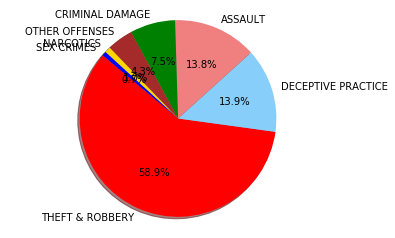

In [92]:
plt.pie(crime_amount, labels=crime_type,   colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

In [57]:
#What percentage crimes in Chicago 2001-2018

#Number of Unique Crimes

crimes_count = crimes_data_df.groupby('Primary Type')['ID'].nunique()
crimes_count_df = pd.DataFrame(crimes_count)


#Rename:
crimes_analysis_df = crimes_count_df.rename(columns={"ID": "Number of Crimes"})

crimes_analysis_df
#crimes_analysis_df.reset_index()

,Number of Crimes
Primary Type,
ASSAULT,264523
CRIMINAL DAMAGE,141268
DECEPTIVE PRACTICE,50591
NARCOTICS,65386
OTHER OFFENSES,101493
SEX CRIMES,8747
THEFT & ROBBERY,359059


# Primary crimes in chicago Area


Text(0.5,0,'crimes')

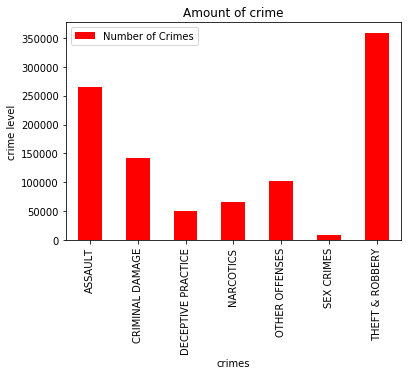

In [58]:
crimes_analysis_df.plot(kind="bar", facecolor="red")

plt.title("Amount of crime")
plt.ylabel("crime level")
plt.xlabel("crimes")

In [26]:
crimes_analysis_df.columns

Index(['Number of Crimes'], dtype='object')

In [41]:
sex_crimes=crimes_data_df.loc[crimes_data_df["Primary Type"]=="SEX CRIMES" , :]
criminal_damage=crimes_data_df.loc[crimes_data_df["Primary Type"]=="CRIMINAL DAMAGE" , :]
deceptive_practice_count=crimes_data_df.loc[crimes_data_df["Primary Type"]=="DECEPTIVE PRACTICE" , :]
narcotics_practice_count=crimes_data_df.loc[crimes_data_df["Primary Type"]=="NARCOTICS" , :]
otheroffences_count=crimes_data_df.loc[crimes_data_df["Primary Type"]=="OTHER OFFENSES" , :]


sex_crimes_count=sex_crimes['Year'].value_counts()
criminal_damage_count=criminal_damage['Year'].value_counts()
deceptive_practice=deceptive_practice_count['Year'].value_counts()
narcotics_practice=narcotics_practice_count['Year'].value_counts()
otheroffences=otheroffences_count['Year'].value_counts()
#df=pd.Series(df)

#df = df.to_frame().reset_index()
#df=df.rename(columns={"index":"year","Year":"count"})
#df=df.sort_values("year",ascending=True, inplace=True)
df=pd.DataFrame({"sex_crimes_count":sex_crimes_count,"criminal_damage_count":criminal_damage_count,
                 "deceptive_practice":deceptive_practice,"narcotics_practice":narcotics_practice,"otheroffences":otheroffences})
df=df.reset_index()
df






,index,sex_crimes_count,criminal_damage_count,deceptive_practice,narcotics_practice,otheroffences
0,2001,30.0,2.0,33.0,NaN,333.0
1,2002,1274.0,10760.0,2190.0,7555.0,7028.0
2,2003,1744.0,15321.0,2672.0,11709.0,9526.0
3,2004,84.0,1323.0,225.0,435.0,941.0
4,2005,NaN,NaN,NaN,NaN,4.0
5,2007,NaN,1.0,NaN,1.0,3.0
6,2008,21.0,217.0,40.0,169.0,263.0
7,2009,360.0,3887.0,858.0,2937.0,2793.0
8,2010,NaN,NaN,1.0,NaN,NaN
9,2011,NaN,1.0,2.0,1.0,2.0


In [45]:
df=df.dropna(how="any")
#df=df.add(0)
df


,index,sex_crimes_count,criminal_damage_count,deceptive_practice,narcotics_practice,otheroffences
1,2002,1274.0,10760.0,2190.0,7555.0,7028.0
2,2003,1744.0,15321.0,2672.0,11709.0,9526.0
3,2004,84.0,1323.0,225.0,435.0,941.0
6,2008,21.0,217.0,40.0,169.0,263.0
7,2009,360.0,3887.0,858.0,2937.0,2793.0
12,2014,30.0,21.0,444.0,13.0,132.0
13,2015,1588.0,27666.0,10792.0,15488.0,20855.0
14,2016,1478.0,34969.0,13166.0,11780.0,23467.0
15,2017,1323.0,30003.0,12024.0,9238.0,21933.0
16,2018,814.0,17096.0,8143.0,6055.0,14205.0


In [44]:
df["sex_crimes_count"].value_counts()

814.0     1
1323.0    1
1478.0    1
1588.0    1
30.0      1
360.0     1
21.0      1
84.0      1
1744.0    1
1274.0    1
Name: sex_crimes_count, dtype: int64

# trend of crimes


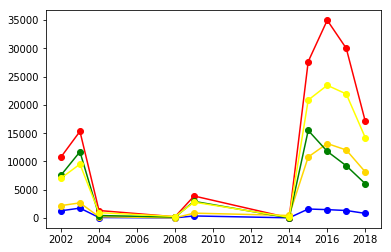

In [50]:
#x_axis=np.arange(2000,2018,1)
sex_crimes=plt.plot(df["index"],df["sex_crimes_count"],marker="o",color="blue",label="sex crime")
criminal_damages=plt.plot(df["index"],df["criminal_damage_count"],marker="o",color="red",label="criminal damage")
deceptive_practices=plt.plot(df["index"],df["deceptive_practice"],marker="o",color="gold",label="deceptive practice")
narcotics_practices=plt.plot(df["index"],df["narcotics_practice"],marker="o",color="green",label="narcotics practice")
otheroffencess=plt.plot(df["index"],df["otheroffences"],marker="o",color="yellow",label="other offences")



In [ ]:


crimes_data1_df=crimes_data_df.loc[crimes_data_df["Primary Type"]=="ASSAULT",:]
x=crimes_data1_df["Year"].value_counts()
crimes_count=pd.DataFrame(x)
crimes_c


In [ ]:

crimes_count = crimes_data_df.groupby('Year')['ID'].nunique()


crimes_count_df = pd.DataFrame(crimes_count)
crimes_count_df


In [ ]:
 

#crimes_count_df=crimes_count_df.set_index
#crimes_count_df

#crimes_count_df=crimes_count_df.reset_index(inplace=True)
crimes_count_df.columns[0]
    




In [ ]:
assualt, =plt.plot(crimes_count_df["Year"],crimes_count_df["ID"], color='gold', label="assualt")

In [ ]:
crimes_data1_df=crimes_data_df.loc[crimes_data_df["Primary Type"]=="ASSAULT",:]
x=crimes_data1_df["Year"].value_counts()
x

y=pd.DataFrame(x)
y=y.reset_index().rename(columns={0:"Total Assualt"})
y.head()

assualt, = plt.plot(y["Year"],y["index"], color="blue", label="assualt" )


In [ ]:
crimes_data2_df=crimes_data_df.loc{crimes}

In [ ]:
x=crimes_data_df['Primary Type'].value_counts()


In [ ]:
# look for missing values
crimes_data_df.count()


In [ ]:
# drop null rows
crimes_data_df = crimes_data_df.dropna(how='any')
crimes_data_df.count()

In [ ]:
#What percentage crimes in Chicago 2001-2018

#Number of Unique Crimes

crimes_count = crimes_data_df.groupby('Primary Type')['ID'].nunique()
crimes_count_df = pd.DataFrame(crimes_count)


#Rename:
crimes_analysis_df = crimes_count_df.rename(columns={"ID": "Number of Crimes"})

crimes_analysis_df

In [ ]:
#dataframe with only 2016-2017:

crime_df=crimes_data_df.loc[crimes_data_df['Year'].isin(['2016','2017'])]



In [ ]:
#crime_assualt=crimes_data_df.loc[crimes_data_df["Primary Type"]== "ASSAULT",:]
assualt, = plt.plot(crimes_data_df["Year"],crimes_data_df["Primary Type"], color="blue", label="assualt" )



In [ ]:
#dataframe with only drugs:
theft_crime_df = crimes_data_df.loc[crimes_data_df["Primary Type"] == "THEFT & ROBBERY", :]

# Store latitude and longitude in locations
ward_df = pd.DataFrame(theft_crime_df.groupby("Ward")["Primary Type"].count())
ward_df = ward_df.reset_index(drop=False)
# Collect the mean unemployment rates for the world
number_crimes = ward_df["Primary Type"]

# Collect the years where data was collected
ward_keys = ward_df["Ward"]
x_axis = np.arange(len(ward_df))
ward_df.head()

In [ ]:
plt.figure(figsize=(30,6))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, number_crimes, width=1.0, color="blue", edgecolor="black", linewidth="0.75", align="center")
plt.xticks(tick_locations, ward_df["Ward"], rotation="horizontal")
plt.tight_layout()

In [ ]:
# Store latitude and longitude in locations
locations = theft_crime_df[["Latitude","Longitude"]]                             
# Drop all rows with missing informationl
locations = locations.dropna(how='any')
locations = locations.reset_index(drop=True)
locations.head()

In [ ]:
# Plot Heatmap
fig = gmaps.figure()
#heat_layer = gmaps.heatmap_layer(locations)
markers = gmaps.marker_layer(locations)
fig.add_layer(markers)
fig

In [ ]:
#dataframe with only 2016-2017;

2016_crime_df = crimes_data_df.loc[crimes_data_df["Year"] == "2016", :]


2017_crime_df = crimes_data_df.loc[crimes_data_df["Year"] == "2017", :]

In [ ]:
# drop null rows
no_null_crime_df = crimes_data_df.dropna(how='any')

In [ ]:
# verify counts
no_null_crime_df.count()

In [ ]:
# Check to see if there are any values with mispelled or similar values in "Offense Type"
no_null_crime_df["Primary Type"].value_counts()

In [ ]:
no_null_crime_sort_df = no_null_crime_df.sort_values("Ward", ascending=False)
no_null_crime_sort_df.head()


In [ ]:
x=no_null_crime_df['Ward'].unique()
x

In [ ]:
new_table=no_null_crime_df.groupby(["X Coordinate","Y Coordinate","Ward"]).size().reset_index().rename(columns={0:"Number of crimes"})
new_table.head(200)

In [ ]:
new_table1=no_null_crime_df.groupby(["Primary Type","Description","Ward"]).size().reset_index().rename(columns={0:"Number of ride"})

In [ ]:
x=no_null_crime_df['Primary Type'].value_counts()
y=no_null_crime_df['Ward'].value_counts()
y

In [ ]:
group_up = no_null_crime_df.loc[no_null_crime_df["Primary Type"] == "THEFT", :]
group_up.head()